<h1 style="color:salmon; font-size:2.5em;">Cross Validation2</h1>

<div style="color:#A9CCE3; font-size:1.5em">
    
When performing supervised machine learning analysis, it is common to withhold a portion of the data to test the final model's performance. This model testing is performed on the 'unseen' data, which the model was not trained on. This withholding of a portion of the dataset for testing is called Cross-Validation. Cross-Validation can also be used to select hyper-parameters and test the final model. In this section, we will focus on the test data only.

Cross-Validation also helps avoid over-fitting; a complex model could repeat the labels of the samples that it has just seen and, therefore, would have a perfect score but would fail to predict anything useful on the 'unseen' data. Furthermore, a complex model could just be modeling noise.

Cross validation method involves dividing the dataset into 3 parts:

<li>training set - is a portion of the data used for training the model</li>
<li>validation set - is a portion of the data used to optimize the hyper-parameters of the model. This will be illustrated in the next lab
<li>test set - is a portion of the data used to evaluate if the model generalizes enough to work on the data it was not trained on</li>
<br>
<code style="background-color:#FDEBD0; color:#CD6155;">Scikit Learn</code> library contains many methods that can perform the splitting of the data into training, testing and validation sets. The most popular methods that we will cover now:

<li><code style="background-color:#FDEBD0; color:#CD6155;">train_test_split</code> - creates a single split into train and test sets</li>
<li><code style="background-color:#FDEBD0; color:#CD6155;">K-fold</code> - creates number of k-fold splits, allowing cross validation</li>
<li><code style="background-color:#FDEBD0; color:#CD6155;">cross_val_score</code> - evaluates model's score through cross validation</li>
    
</div>

In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline


In [3]:
# load the data

url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/encoded_car_data.csv'
data = pd.read_csv(url)
data.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [4]:
data.dtypes.value_counts()

float64    36
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 36 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diesel       205 non-null    float64
 1   gas          205 non-null    float64
 2   std          205 non-null    float64
 3   turbo        205 non-null    float64
 4   convertible  205 non-null    float64
 5   hardtop      205 non-null    float64
 6   hatchback    205 non-null    float64
 7   sedan        205 non-null    float64
 8   wagon        205 non-null    float64
 9   4wd          205 non-null    float64
 10  fwd          205 non-null    float64
 11  rwd          205 non-null    float64
 12  dohc         205 non-null    float64
 13  dohcv        205 non-null    float64
 14  l            205 non-null    float64
 15  ohc          205 non-null    float64
 16  ohcf         205 non-null    float64
 17  ohcv         205 non-null    float64
 18  rotor        205 non-null    float64
 19  eight   

<div style="color:#A9CCE3; font-size:1.5em">
    
→ As we see from above, we now have only numeric parameters.
    
</div>

In [6]:
# split our data into X features and y target.
X = data.drop(columns=['price'])
y = data['price'].copy()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
# model:
lr = LinearRegression()
# model fit:
lr.fit(X_train, y_train)
# predicteion:
predicted =lr.predict(X_test)

<div style="color:#A9CCE3; font-size:1.5em">
    
Now, let's check some evaluation statistics, such as the coefficient of determination, $R^{2}$, using the built-in method `score` or  `r2_score`, and the Root Mean Square Error, RMSE, for which we can use the `mean_squared_error` method, MSE.

The $R^{2}$ statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively.

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.
    
</div>

In [8]:
lr.score(X_train,y_train)

0.9261981895971949

<div style="color:#A9CCE3; font-size:1.5em">
    
>&#128161; <em>Using the training data only, the $R^{2}$ is \~ 0.93. So, almost 93% of variability in the training data is explained by our model.</em>

    
</div>

In [9]:
lr.score(X_test,y_test)

0.8500551011878996

In [10]:
# using r2_score with the same result:
print(r2_score(y_true=y_test, y_pred=predicted))

0.8500551011878996


<div style="color:#A9CCE3; font-size:1.5em">
    
>&#128161; <em>Using the test data  $R^{2}$, we get \~0.85, not as good as the previous score.
</em>

    
</div>

<div style="color:#A9CCE3; font-size:1.5em">
    
Now, let's calculate the RMSE. The smaller the RMSE number the better our model is.
We apply `mean_squared_error` to our `y_test` and our predicted data. <br>Then, we take a square root of our MSE, using `np.sqrt()` function.


    
</div>

In [11]:
mse = mean_squared_error(y_true=y_test, y_pred=predicted)
rmse = np.sqrt(mse)
rmse

3223.172216951375


<h2 style="color:salmon;"> Prediction Example</h2>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
Let's select some random data, using `iloc` and see some predicted versus actual values for the car prices.

<div>

In [12]:
some_data = X.iloc[:3]
some_labels = y.iloc[:3]

print("Predictions:", lr.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [13136.5 13136.5 15331.5]
Labels: [13495.0, 16500.0, 16500.0]


In [13]:
predicted = lr.predict(X_test)
predicted

array([27673.  , 21306.5 , 10731.75, 12098.5 , 26182.5 ,  5422.75,
        8206.75,  7521.25, 10133.25,  9568.25, 17289.25,  7369.25,
       16499.5 , 10778.75, 39805.5 ,  5530.25,  2453.  , 15548.5 ,
       10740.75, 11435.25, 10798.  , 15860.5 , 10356.  ,  3644.75,
        6992.5 , 28662.75, 18291.  , 15265.75,  4490.5 , 16435.25,
       26810.75,  5815.5 ,  4933.75, 16826.5 ,  8276.5 , 30296.75,
       12268.5 , 12934.25,  6289.75, 15975.5 ,  8184.  , 15277.75,
       14764.25,  5273.5 ,  6240.5 ,  9097.  ,  5815.5 ,  7237.25,
       16745.  , 15406.75,  5050.5 , 21925.  ,  7226.75, 11396.  ,
        4428.25, 16473.5 , 18310.  , 12934.25, 29684.25,  5446.25,
        9815.5 , 17210.5 ])


    
<div style="color:#A9CCE3; font-size:1.5em">
    
We can also use the pipeline to run operations on our data. For example we can standardize our data then perform linear regression by applying the method <code>fit</code>.


<div>

In [14]:
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
pipe.fit(X_train,y_train)
pipe

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])

In [15]:
# Let's calculate the R squared
pipe.score(X_train,y_train)

0.9262722224294516

→ Using the training data only, the R squared is ~ 0.93.<br>
Now, let's check the R squared on the test set.

In [16]:
pipe.score(X_test,y_test)

0.8419174509630335

→ The R squared is much lower. This value provides more accurate evaluation of our model since we test our model on the 'unseen' data set. In case if the R squared is negative, it is because the model is too complex and the data is overfitting. For more information, please, visit this documentation on overfitting.

This will make more sense when we explore polynomial regression.


<h2 style="color:salmon;"> Exercise 1</h2>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
Create a pipeline object called pipe1, replace standardization with normalization. Calculate the $R^{2}$ using the built-in method `score` and for RMSE, using `mean_squared_error` method.
    
<div>

In [17]:
pipe1 = Pipeline([('norm', Normalizer() ),('lr', LinearRegression())])
pipe1.fit(X_train,y_train)

# Calculate R2 and RMSE on the test set
y_pred = pipe1.predict(X_test)
r2 = pipe1.score(X_test, y_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("R2:", r2)
print("RMSE:", rmse)

R2: -1.346604622143935e+18
RMSE: 9659123380530.787


<div style="color:#A9CCE3; font-size:1.5em">
    
Note, you can also use `normalize` by setting the `LinearRegression(normalize=True)`:

    
<div>
    
```python
pipe1 = Pipeline([
    ('norm', Normalizer()),
    ('lr', LinearRegression(normalize=True))
])
# rest of the code is the same
```


<h2 style="color:salmon;"> One feature</h2>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
We can use the test data to select a feature with the best performance. We have a list of features:

    
<div>

In [19]:
features=list(X)
print(features, sep=' | ')

['diesel', 'gas', 'std', 'turbo', 'convertible', 'hardtop', 'hatchback', 'sedan', 'wagon', '4wd', 'fwd', 'rwd', 'dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', 'eight', 'five', 'four', 'six', 'three', 'twelve', 'two', 'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'carlength', 'carwidth', 'citympg', 'highwaympg']


<div style="color:#A9CCE3; font-size:1.5em">
    
We can train a linear regression model using each feature and use the test data to obtain the best feature.
    
<div>

In [20]:
R_2=[]
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])

for feature in features:
    pipe.fit(X_train[[feature]], y_train)
    R_2.append(pipe.score(X_train[[feature]], y_train))

<br>

<div style="color:#A9CCE3; font-size:1.5em">
    
We can plot the $R^{2}$ for each feature:
    
<div>

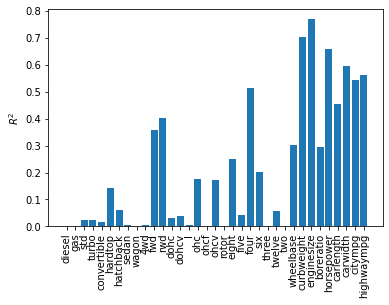

In [21]:
plt.bar(features,R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")
plt.show()

<br>

<div style="color:#A9CCE3; font-size:1.5em">
    
Now, we select the feature that works best, using `argmax()` function.
    
<div>

In [22]:
best=features[np.argmax(R_2)]
best

'enginesize'

<br>

<div style="color:#A9CCE3; font-size:1.5em">
    
So, 'enginesize' is the feature that produces the highest $R^{2}$. We then train the feature that works best using all the data.
    
<div>

In [23]:
pipe.fit(X[[best]],y)

Pipeline(steps=[('ss', StandardScaler()), ('lr', LinearRegression())])


<h2 style="color:salmon;"> Exercise 2</h2>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
Find the best feature using the test data, without standardization.
    
<div>


Best feature using test data w/o standardization:	 enginesize 



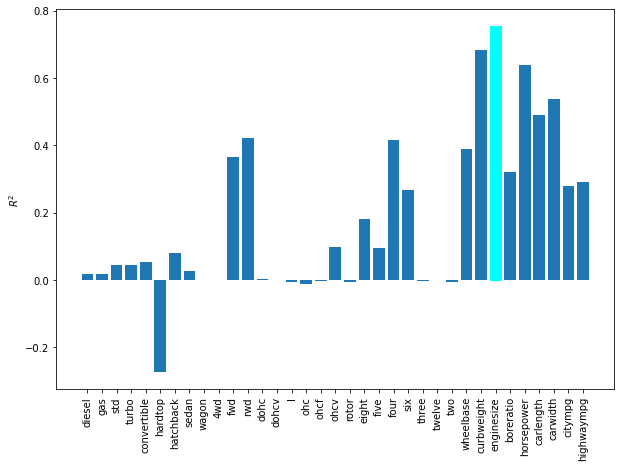

In [37]:
R_2=[]

for feature in features:
    lr.fit(X_train[[feature]], y_train)
    R_2.append(lr.score(X_test[[feature]],y_test))

best = features[np.argmax(R_2)]
print("\nBest feature using test data w/o standardization:\t", best, "\n")

best_index = np.argmax(R_2)

fig, ax = plt.subplots(figsize=(10, 7))
bars = ax.bar(features, R_2)
plt.xticks(rotation=90)
plt.ylabel("$R^2$")

# Conditional formatting for best bar
for i in range(len(bars)):
    if R_2[i] == R_2[best_index]:
        bars[i].set_color('cyan')

plt.show()


<h1 style="color:salmon;"> K Fold Cross Validation</h1>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=5 becoming 5-fold cross-validation, as shown in the Diagram below. In this case, we would use K-1 (or 4 folds) for testing a 1 fold for training. K-fold is also used for hyper-parameters selection that we will discuss later.

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/images/k-fold.png"  />
</center>
    
<div>

<h2 style="color:salmon;"> Cross Validation Score</h2>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
Now, let's use *Scikit-Learn's* *K-fold cross-validation* method to see whether we can assess the performance of our model. The *K-fold cross-validation* method splits the training set into the number of folds (n_splits), as now in the Diagram above, if we have K folds, K-1 is used for training and one fold is used for testing. The input parameters are as follows:
    
<b><span style="color:#C39BD3;">estimatorestimator</span></b>: The object to use to `fit` the data.<br>
<b><span style="color:#C39BD3;">X</span></b>: array-like of shape (n_samples, n_features). The data to fit. Can be for example a list, or an array.<br>
<b><span style="color:#C39BD3;">y</span></b>: array-like of shape (n_samples,) or (n_samples, n_outputs), default=None. The target variable to try to predict in the case of supervised learning.<br>
<b><span style="color:#C39BD3;">scoring</span></b>: A str or a scorer callable object/ function with signature scorer (estimator, X, y) which should return only a single value.  See model evaluation 
    
<div>

In [38]:
N=len(X)
N

205

In [39]:
# create a Linear Regression object
lr = LinearRegression()
# calculate cross validation scores based on our testing sets
scores = cross_val_score(lr, X, y, scoring ="r2", cv=3)
scores

array([ 0.81508001,  0.7238302 , -0.0913317 ])


<div style="color:#A9CCE3; font-size:1.5em">
    
We can calculate mean and standard deviation using the following function of the `scores`:

    
<div>

In [40]:
def display_scores(scores, print_=False):
    
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
    
display_scores(scores)

Scores: [ 0.81508001  0.7238302  -0.0913317 ]
Mean: 0.4825261694103302
Standard deviation: 0.40748519272512795



<div style="color:#A9CCE3; font-size:1.5em">
    
The larger the fold, the better the model performance is, as we are using more samples for training; the variance also decreases.<br>
Cross Validation Scores are RMSE values for training the data on each of our folds, in our case cv = 3, so we get 3 scores, 1 for each fold.
    
<div>



<h2 style="color:salmon;"> Exercise 3</h2>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
Compute the cross validation scores for 5 folds, using the linear regression object `lr` and `neg_mean_squared_error` method for scoring.
    
<div>

In [44]:
lr = LinearRegression()
scores5 = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
scores5 = np.sqrt(-scores5)

display_scores(scores5)

Scores: [ 3155.3045326  11345.67407101  3025.79039538  5629.2248323
  5549.16298134]
Mean: 5741.031362524296
Standard deviation: 3017.2786021293505


<h2 style="color:salmon;"> K Fold</h2>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
In many cases, we would like to train models that are not available in Scikit-learn or are too large to fit in the memory. We can create a `KFold` object that  Provides train/test indices to split data into train/test sets in an iterative manner.

`n_splitsint`:  A number of folds. Must be at least 2. Changed in version 0.22: n_splits default value changed from 3 to 5.<br>
`shuffle`: Indicates whether to shuffle the data before splitting into batches. Note, the samples within each split will not be shuffled.<br>
`random_state`: the random state.
    
<div>

In [45]:
# We create the  `KFold` object `kf`, setting the number of splits to 2.
n_splits=2
kf = KFold(n_splits = n_splits)

    
<div style="color:#A9CCE3; font-size:1.5em">
    
We train the model using the `split(X,y)` method. It provides the train/test indices for `X` and `y`. Half the data is used for training in the first iteration, and the rest is used for testing and displaying the indexes for each set.  For the second iteration, the data used for training is used for testing, and the testing data is used for training. We store the $R^2$ for each iteration in the array  `R_2`. The `np.zeros()` function returns a new array of given shape and type, filled with zeros. Then, we calculate the $R^2$ for each of the X_train and X_test splits.
    
<div>

In [46]:
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2 = np.zeros((n_splits,1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n = 0

for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    
    y_train, y_test = y[train_index], y[test_index]
    pipe.fit(X_train, y_train)
    n += 1
    R_2[k]=pipe.score(X_test, y_test)

TRAIN: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204]
TEST: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35


    
<div style="color:#A9CCE3; font-size:1.5em">
<br>    
We can calculate the average $R^2$:

    
<div>

In [47]:
R_2.mean()

0.39256530180315163

    
<div style="color:#A9CCE3; font-size:1.5em">
<br>    
If we set the number of splits to three, we see 2/3's of the data is used for training.

    
<div>

In [48]:
n_splits = 3
kf = KFold(n_splits = n_splits)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2 = np.zeros((n_splits, 1))
pipe = Pipeline([('ss',StandardScaler() ),('lr', LinearRegression())])
n = 0
for k,(train_index, test_index) in enumerate(kf.split(X,y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    
    y_train, y_test = y[train_index], y[test_index]
    pipe.fit(X_train, y_train)
    n += 1
    R_2[k] = pipe.score(X_test, y_test)
    
    
R_2.mean()

TRAIN: [ 69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86
  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158
 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204]
TEST: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  

0.47719341451693237



<h2 style="color:salmon;"> Exercise 4</h2>
    
<div style="color:#A9CCE3; font-size:1.5em">
    
It many applications, it is useful to randomly select samples for K fold cross validation. In this Exercise, randomly select samples by setting `shuffle` to `True` in the `KFold` constructor. Use all the parameters, as above.
    
<div>

In [49]:
n_splits = 3
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
y = data['price'].copy()
X = data.drop(columns=['price'])
R_2 = np.zeros((n_splits, 1))
pipe = Pipeline([('ss', StandardScaler()), ('lr', LinearRegression())])
n = 0
for k, (train_index, test_index) in enumerate(kf.split(X, y)):
    print("TRAIN:", train_index)
    print("TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    pipe.fit(X_train, y_train)
    n += 1
    R_2[k] = pipe.score(X_test, y_test)

R_2.mean()


TRAIN: [  0   1   2   3   4   6   7   8  10  11  13  14  17  20  21  22  23  26
  27  28  32  33  34  36  37  39  40  41  42  43  44  46  47  48  49  50
  51  52  53  54  57  58  59  61  62  63  64  70  71  72  74  77  78  80
  81  83  85  87  88  89  91  92  94  99 102 103 105 106 107 108 109 110
 113 114 115 116 117 118 119 121 122 123 124 126 127 129 130 131 133 134
 135 136 137 138 140 141 142 148 149 150 151 155 156 157 158 160 161 163
 165 166 169 170 171 172 176 179 180 181 183 184 185 186 187 188 189 190
 192 193 196 197 198 199 200 201 203 204]
TEST: [  5   9  12  15  16  18  19  24  25  29  30  31  35  38  45  55  56  60
  65  66  67  68  69  73  75  76  79  82  84  86  90  93  95  96  97  98
 100 101 104 111 112 120 125 128 132 139 143 144 145 146 147 152 153 154
 159 162 164 167 168 173 174 175 177 178 182 191 194 195 202]
TRAIN: [  1   3   5   7   8   9  12  13  14  15  16  17  18  19  20  21  24  25
  29  30  31  34  35  37  38  43  45  48  49  50  52  53  54  55  56  57


0.6904823744622521